In [48]:
import pandas as pd
import numpy as np
from os import listdir

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from pylab import cm
import scipy.optimize

import sys         
  


In [49]:
sys.path.append('C:/Users/amilas/Desktop/Python-analysis/functions')    

from my_functions import create_fig

In [50]:
px_size = 0.1625


In [51]:
directories = ["Baz_Jupiter_polar//", "Baz_Jupiter_nonpolar//", "Par1_Jupiter//", "Par1_Baz//", "Par1_Jupiter_long//", "aPKC_Baz_long//", 
"Par1_Baz_long//", "Par1_oskar//", "aPKC_Baz_schneider//", "Par1_Baz_schneider//"]
timeintervals = [30, 30, 30, 60, 600, 600, 600, 300, 300, 60]
green_channel = ["Baz", "Baz", "Par1", "Par1", "Par1", "aPKC", "Par1", "Par1", "aPKC", "Par1"]
red_channel = ["Jupiter", "Jupiter", "Jupiter", "Baz", "Jupiter", "Baz", "Baz", "oskar", "Baz", "Baz"]

info_df = pd.DataFrame(data={"directory": directories, "timeinterval": timeintervals, "green_channel": green_channel, "red_channel": red_channel})


In [58]:
#channel_color = "red"
#info_subdf = info_df[(info_df.green_channel == "Par1") & (info_df.timeinterval == 60) & (info_df.red_channel == "Baz")]# & (info_df.timeinterval < 600)]

#channel_color = "green"
#info_subdf = info_df[(info_df.timeinterval == 600) & (info_df.red_channel == "Jupiter") & (info_df.green_channel == "Par1")]# & (info_df.timeinterval < 600)]

#channel_color = "green"
#info_subdf = info_df[(info_df.timeinterval == 300) & (info_df.red_channel == "oskar") & (info_df.green_channel == "Par1")]# & (info_df.timeinterval < 600)]
#info_subdf = info_df[(info_df.timeinterval > 60) & (info_df.red_channel != "Baz") & (info_df.green_channel == "Par1")]# & (info_df.timeinterval < 600)]

channel_color = "red"
info_subdf = info_df[(info_df.timeinterval == 300) & (info_df.red_channel == "oskar") & (info_df.green_channel == "Par1")]# & (info_df.timeinterval < 600)]

channel_color = "green"
info_subdf = info_df[(info_df.timeinterval == 300) & (info_df.red_channel == "oskar") & (info_df.green_channel == "Par1")]# & (info_df.timeinterval < 600)]


#channel_color = "green"
#info_subdf = info_df[(info_df.timeinterval == 300) & (info_df.red_channel == "Baz") & (info_df.green_channel == "aPKC")]# & (info_df.timeinterval < 600)]

#channel_color = "red"
#info_subdf = info_df[(info_df.timeinterval == 300) & (info_df.red_channel == "Baz") & (info_df.green_channel == "aPKC")]# & (info_df.timeinterval < 600)]


#channel_color = "red"
#info_subdf = info_df[(info_df.green_channel == "Par1") & (info_df.timeinterval == 600) & (info_df.red_channel == "Baz")]# & (info_df.timeinterval < 600)]

#channel_color = "green"
#info_subdf = info_df[(info_df.green_channel == "Par1") & (info_df.red_channel == "Jupiter") & (info_df.timeinterval == 600)]

#channel_color = "red"
#info_subdf = info_df[(info_df.green_channel == "Par1") & (info_df.red_channel == "Baz") & (info_df.timeinterval == 60)]


channel_color = "green"
#channel_color = "red"

info_subdf = info_df[(info_df.green_channel == "Par1") & (info_df.red_channel == "Baz") & (info_df.timeinterval == 60)]


#channel_color = "green"
#info_subdf = info_df[(info_df.green_channel == "Baz") & (info_df.timeinterval == 30)]# & (info_df.directory == "Baz_Jupiter_nonpolar//")]
#info_subdf = info_df[(info_df.green_channel == "Baz") & (info_df.timeinterval == 30) & (info_df.directory == "Baz_Jupiter_polar//")]


#channel_color = "red"
#info_subdf = info_df[(info_df.red_channel == "Baz") & (info_df.timeinterval == 600)]

#channel_color = "green"
#info_subdf = info_df[(info_df.green_channel == "aPKC")]# & (info_df.red_channel == "Jupiter")]
#channel_color = "red"
#info_subdf = info_df[(info_df.green_channel == "aPKC")]# & (info_df.red_channel == "Jupiter")]

last_frame_int=[]
intensities_all = pd.DataFrame()
for directory in info_subdf.directory.unique():
    
    files = listdir(directory)
    dt = info_subdf[info_subdf.directory==directory].timeinterval.values[0]
    if dt == 30: limit = 120
    elif dt == 60: limit = 60
    elif dt == 600: limit = 18
    elif dt == 300: limit = 35

    for index, file in enumerate(files[0::2]):

    #for index, file in enumerate(files[0::3]):
        if channel_color in file:
            intensities = pd.read_csv(directory+file)[0:limit]
            background = pd.read_csv(directory+files[index*2+1])[0:limit]
            #background = pd.read_csv(directory+files[index*3+1])[0:limit]
            #nonablated = pd.read_csv(directory+files[index*3+2])[0:limit]
            print(file, files[index*2+1])


  
            
            #subtract background
    
            intensities["Background_norm"] = intensities.Mean - background.Mean
            #intensities["Background_norm"] = (intensities.Mean/intensities.Mean[0])/(background.Mean/background.Mean[0])
            #intensities["Background_norm"] = intensities.Mean/background.Mean
            #intensities["Background_norm"] = background.Mean
            #intensities["Background_norm"] = (intensities.Mean[0:16]/intensities.Mean[0]) / (y_mean/y_mean[0]).values[0:16]
            #intensities["Background_norm"] = intensities.Mean#-intensities.Mean[0]  ##apkc

            #intensities["Background_norm"] = (intensities.Mean)* (background.Mean[0]/background.Mean)   ##apkc


            intensities["Mean"] = intensities.Background_norm

            
            #normalize
            #intensities["Normalized"] = (intensities.Mean - intensities.Mean[0])
            intensities["Normalized"] = intensities.Mean#/intensities.Mean[0]    
            


            intensities[file] = intensities["Normalized"]#/intensities["Normalized"].max()#/intensities.Mean[0]#intensities["Normalized"].min()
            intensities[file+"_time"] = np.arange(len(intensities))*dt

            if dt <6:
                index = pd.date_range('1/1/2000', periods=len(intensities[file]), freq=str(dt)+"s")
                series = pd.Series(intensities[file].values, index=index)
                
                resample_time = 1*600
                resampled_data = series.resample(str(resample_time/60)+ " min").mean()
                #print(series.resample(str(resample_time)+ "s").mean())
                #intensities[file+"_time"] = np.arange(len(intensities))*resample_time

                final_intensities = pd.DataFrame(data={file: resampled_data.values, file+"_time": np.arange(len(resampled_data))*resample_time})
            
            else: 
                final_intensities = intensities.reset_index()[[file, file+"_time"]]

            intensities_all = pd.concat([intensities_all, final_intensities], axis=1)






20201119_Oocyte3_green.csv 20201119_Oocyte3_green_background.csv
20201119_Oocyte5_green.csv 20201119_Oocyte5_green_background.csv
20201119_Oocyte7_green.csv 20201119_Oocyte7_green_background.csv
20201126_Oocyte1_green.csv 20201126_Oocyte1_green_background.csv
20201126_Oocyte3_green.csv 20201126_Oocyte3_green_background.csv
20220727_Exp3_position1_green.csv 20220727_Exp3_position1_green_background.csv
20220727_Exp3_position2_green.csv 20220727_Exp3_position2_green_background.csv
20220727_Exp5_position1_green.csv 20220727_Exp5_position1_green_background.csv
20220727_Exp5_position3_green.csv 20220727_Exp5_position3_green_background.csv
20220727_Exp7_position1_green.csv 20220727_Exp7_position1_green_background.csv
20220727_Exp7_position3_green.csv 20220727_Exp7_position3_green_background.csv
20220728_Exp2_position1_green.csv 20220728_Exp2_position1_green_background.csv
20220728_Exp4_position1_green.csv 20220728_Exp4_position1_green_background.csv
20220728_Exp4_position2_green.csv 20220728_

Text(0.5, 1.0, 'Par1')

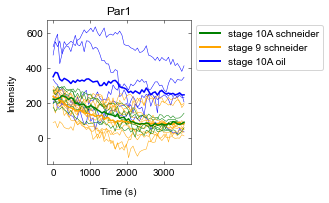

In [59]:
COLOR= "black"
plot_size = "small"
fig, ax = create_fig(COLOR=COLOR, plot_size=plot_size)

stages = []
## par1 jupiter long
#stages = ["9", "10A", "9", "9", "9", "9", "9", "10A", "9", "10A", "10A", "9", "10A", "9"]

## par1 oskar
stages = ["10A", "10A", "10A", "9", "9", "10A", "10A", "9", "8", "9", "10A", "9", "9", "9", "8"]


## par1 baz
stages = ["10A", "10A", "10A", "10A", "10A", "9", "9", "9", "9", "9", "9", "9", "9", "8", "9", "8", "9", "8", "8", "9", "8"]  #here stage 8 is actually stage 10A schneider


#stages = ["Polar cells and PFCs"]*5+["Only PFCs"]*6


## aPKC Baz
#stages = ["10A","9", "10A", "9", "9", "9", "10A", "9", "9"]



df = pd.DataFrame(index=np.arange(0,11000,30))

for oocyte_index, oocyte in enumerate(intensities_all.columns[0::2]):
    if len(stages)>0:
        #oocyte_length = oocytes_lengths_um[oocyte_index]
        oocyte_stage = stages[oocyte_index]
        #if oocyte_length < 80: linecolor = "green"
        #elif (oocyte_length >80 and oocyte_length <120): linecolor = "orange"
        #else: linecolor="blue"
        
        if oocyte_stage == "9" or oocyte_stage =="Polar cells and PFCs": linecolor = "orange"
        elif oocyte_stage == "8" : linecolor = "green"
        else: linecolor = "blue"
        
        if oocyte_stage != "99":
            ax.plot(intensities_all[oocyte+"_time"], intensities_all[oocyte], linewidth=plt.rcParams['axes.linewidth'], color=linecolor)
            df[oocyte] = np.nan
            for idx, time in enumerate(intensities_all[oocyte+"_time"].dropna()):
                df.loc[int(time), oocyte] = intensities_all[oocyte][idx]

            legend_lines = [Line2D([0], [0], color="green", lw=2), Line2D([0], [0], color="orange", lw=2),
                Line2D([0], [0], color="blue", lw=2)]  
            ax.legend(legend_lines, ["stage 8", "stage 9", "stage 10A old"], bbox_to_anchor=(1, 1), loc='upper left')
            
            #ax.legend(legend_lines, ["stage 10A schneider", "stage 9 schneider", "stage 10A oil"], bbox_to_anchor=(1, 1), loc='upper left')

            #ax.legend(legend_lines, ["Polar cells","Non polar PFCs"], bbox_to_anchor=(1, 1), loc='upper left')
            
    else: 
            ax.plot(intensities_all[oocyte+"_time"], intensities_all[oocyte], linewidth=plt.rcParams['axes.linewidth'])

            df[oocyte] = np.nan
            for idx, time in enumerate(intensities_all[oocyte+"_time"].dropna()):
                df.loc[int(time), oocyte] = intensities_all[oocyte][idx]




        
df.dropna(axis = 0, how = 'all', inplace=True)
df.sort_index(inplace=True)
df['Mean'] = df.mean(axis=1)

x_mean = df.index.values
y_mean = df.Mean
#ax.plot(x_mean, y_mean, linewidth=plt.rcParams['axes.linewidth']*3, color=COLOR)
#ax.plot(x_mean[0:13], y_mean[0:13], linewidth=plt.rcParams['axes.linewidth']*3, color=COLOR)

ax.plot(x_mean, pd.DataFrame([df.iloc[:, i] for i,s in enumerate(stages) if s=="9"]).mean(), linewidth=plt.rcParams['axes.linewidth']*3, color="orange")
ax.plot(x_mean, pd.DataFrame([df.iloc[:, i] for i,s in enumerate(stages) if s=="10A"]).mean(), linewidth=plt.rcParams['axes.linewidth']*3, color="blue")
ax.plot(x_mean, pd.DataFrame([df.iloc[:, i] for i,s in enumerate(stages) if s=="8"]).mean(), linewidth=plt.rcParams['axes.linewidth']*3, color="green")

#ax.plot(x_mean, pd.DataFrame([df.iloc[:, i] for i,s in enumerate(stages) if s=="Polar cells and PFCs"]).mean(), linewidth=plt.rcParams['axes.linewidth']*3, color="orange")
#ax.plot(x_mean, pd.DataFrame([df.iloc[:, i] for i,s in enumerate(stages) if s=="Only PFCs"]).mean(), linewidth=plt.rcParams['axes.linewidth']*3, color="blue")


#ax.plot(df.index.values[:-2], df.Mean[:-2], linewidth=plt.rcParams['axes.linewidth']*3, color=COLOR)
num=int(intensities_all.shape[1]/2)

#ax.set_ylim([-200, 900])
#ax.set_xlim([-200, 7200])
plt.title("Par1")

In [38]:
for k in ["8", "9", "10A"]:
    df_stage = pd.DataFrame([df.iloc[:, i] for i,s in enumerate(stages) if s==k])#.mean()
    df_stage = df_stage.T.reset_index(drop=False)
    col_names = ["time"]
    col_names.extend(["Exp"+str(n+1) for n in range(df_stage.shape[1]-1)])
    df_stage.columns = col_names
    df_stage.to_csv(f"Par1_stage{k}_individual.txt", header=None, sep=' ')
    print(df_stage)

    time     Exp1     Exp2     Exp3     Exp4     Exp5
0      0  267.600  197.783  174.895  268.736  195.406
1     60  245.670  208.851  150.874  271.692  206.445
2    120  258.244  204.273  165.486  293.936  192.863
3    180  287.755  201.547  163.031  284.405  204.733
4    240  283.914  234.230  175.781  292.213  219.818
5    300  294.082  253.915  158.989  276.170  198.954
6    360  274.694  247.383  150.228  264.546  217.981
7    420  273.854  241.727  137.668  270.511  168.629
8    480  270.591  264.955  156.033  277.991  178.851
9    540  279.382  264.498  135.046  259.566  177.357
10   600  259.204  210.996  114.163  231.510  163.429
11   660  280.347  189.384  109.071  254.570  161.989
12   720  273.155  183.355   94.596  229.194  159.707
13   780  221.198  206.873   87.578  263.148  185.036
14   840  252.819  192.879   72.568  258.956  170.756
15   900  210.004  171.084   94.544  251.523  139.623
16   960  230.516  158.487   78.998  245.504  176.918
17  1020  221.402  193.594  

In [ ]:
def monoExp(x, t, a, b):
    return a*np.exp(-t *x)+b



R² = 0.696725111578722
T_1/2 = 4840.353066423336
-2.491071202086123e-08 -765168.851631408 765353.3857367759


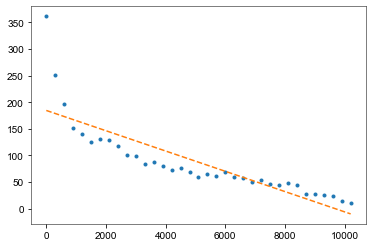

In [ ]:
mean_intensity = pd.DataFrame([df.iloc[:, i] for i,s in enumerate(stages) if s=="9"]).mean()
dt = 300
ys = mean_intensity#/mean_intensity[0]
#ys = [np.mean(mean_intensity[i:i+2]) for i in range(0, len(mean_intensity), 3)]
xs = np.array([dt*i for i in range(len(ys))])

p0 = [0, max(ys)-min(ys), min(ys)]

# perform the fit
params, cv = scipy.optimize.curve_fit(monoExp, xs, ys, p0, maxfev=10000000)
t, a, b = params
t_half = -np.log((a-b)/(2*a))/t

# determine quality of the fit
squaredDiffs = np.square(ys - monoExp(xs, t, a, b))
squaredDiffsFromMean = np.square(ys - np.mean(ys))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")



# plot the results
plt.plot(xs, ys, '.', label="data")
plt.plot(xs, monoExp(xs, t, a, b), '--', label="fitted")


# inspect the parameters
print(f"T_1/2 = {t_half}")
print(t,a,b)

(-0.2, 1.2)

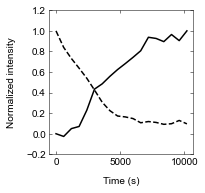

In [ ]:
fig, ax = create_fig(ylabel="Normalized intensity", plot_size="small")
ax.plot(par_1_stage9/max(par_1_stage9), "--", linewidth=plt.rcParams['axes.linewidth']*3, color=COLOR)
ax.plot(apkc_all/max(apkc_all), linewidth=plt.rcParams['axes.linewidth']*3, color=COLOR)
ax.set_ylim([-0.2, 1.2])

In [ ]:
## par1 jupiter long
stages = ["9", "10A", "9", "9", "9", "9", "9", "10A", "9", "10A", "10A", "9", "10A", "9"]
oocytes_lengths = [398.503,
793.006,
633.432,
465.249,
491.798,
643.72,
428.843,
843.801,
457.349,
731.465,
829.352,
583.454,
864.63,
602.1]

oocytes_lengths_um = [l*px_size for l in oocytes_lengths]


In [ ]:
#baz jupiter short polar
stages = ["9", "10A", "9", "10A", "9"]


In [ ]:
#baz jupiter short nonpolar
stages = ["10A", "10A", "9", "9", "9", "9"]

In [ ]:
#baz jupiter short polar and nonpolar
stages = ["9", "10A", "9", "10A", "9", "10A", "10A", "9", "9", "9", "9"]


In [ ]:
#par1 baz long
oocytes_lengths = [554.59,
741.758,
522.457,
891.704,
830.304,
773.264,
900.5,
889.758,
830.03,
989.604]

stages = ["9", "10A", "9", "10A", "10A", "10A", "10A", "10A", "10A", "10A"]


In [ ]:
oocytes_lengths = [398.503,
793.006,
633.432,
465.249,
491.798,
643.72,
428.843,
843.801,
457.349,
725.276,
829.352,
583.454,
864.63,
602.1,
554.59,
741.758,
522.457,
891.704,
830.304,
773.264,
900.5,
889.758,
830.03,
989.604]

stages = ["9", "10A", "9", "9", "9", "9", "9", "10A", "9", "10A", "10A", "9", "10A", "9", "9", "10A", "9", "10A", "10A", "10A", "10A", "10A", "10A", "10A"]

In [ ]:
len(oocytes_lengths)

24

In [60]:
title="Par1_intensity_Par1_Baz_line"
fig.savefig(f'{title}_{COLOR}.pdf', dpi=300, transparent=True, bbox_inches='tight')
fig.savefig(f'{title}_{COLOR}.png', dpi=300, transparent=True, bbox_inches='tight')

In [57]:
title="Baz_intensity_Par1_Baz_line"
fig.savefig(f'{title}_{COLOR}.pdf', dpi=300, transparent=True, bbox_inches='tight')
fig.savefig(f'{title}_{COLOR}.png', dpi=300, transparent=True, bbox_inches='tight')

In [33]:
title="aPKC_intensity_aPKC_Baz_line_background_corr"
fig.savefig(f'{title}_{COLOR}.pdf', dpi=300, transparent=True, bbox_inches='tight')
fig.savefig(f'{title}_{COLOR}.png', dpi=300, transparent=True, bbox_inches='tight')

In [12]:
title="aPKC_intensity_aPKC_Baz_line"
fig.savefig(f'{title}_{COLOR}.pdf', dpi=300, transparent=True, bbox_inches='tight')
fig.savefig(f'{title}_{COLOR}.png', dpi=300, transparent=True, bbox_inches='tight')

In [16]:
title="Baz_intensity_aPKC_Baz_line"
fig.savefig(f'{title}_{COLOR}.pdf', dpi=300, transparent=True, bbox_inches='tight')
fig.savefig(f'{title}_{COLOR}.png', dpi=300, transparent=True, bbox_inches='tight')

In [87]:
title="oskar_intensity_Par1_oskar_line"
fig.savefig(f'{title}_{COLOR}.pdf', dpi=300, transparent=True, bbox_inches='tight')
fig.savefig(f'{title}_{COLOR}.png', dpi=300, transparent=True, bbox_inches='tight')

In [83]:
title="Par1_intensity_Par1_oskar_line"
fig.savefig(f'{title}_{COLOR}.pdf', dpi=300, transparent=True, bbox_inches='tight')
fig.savefig(f'{title}_{COLOR}.png', dpi=300, transparent=True, bbox_inches='tight')

In [ ]:
title="Baz-mCh_norm2"
fig.savefig(f'{title}_{COLOR}.pdf', dpi=300, transparent=True, bbox_inches='tight')
fig.savefig(f'{title}_{COLOR}.png', dpi=300, transparent=True, bbox_inches='tight')

In [ ]:
title="Baz-mCh_background"
fig.savefig(f'{title}_{COLOR}.pdf', dpi=300, transparent=True, bbox_inches='tight')
fig.savefig(f'{title}_{COLOR}.png', dpi=300, transparent=True, bbox_inches='tight')

In [ ]:
title="aPKC_Par1_ablation"
fig.savefig(f'{title}_{COLOR}.pdf', dpi=300, transparent=True, bbox_inches='tight')
fig.savefig(f'{title}_{COLOR}.png', dpi=300, transparent=True, bbox_inches='tight')

In [ ]:
title="aPKC_ablation_long_with_Baz"
ax.text(0, 3750, 'n='+str(num), size=plt.rcParams['font.size'])
fig.savefig(f'{title}_{COLOR}.pdf', dpi=300, transparent=True, bbox_inches='tight')
fig.savefig(f'{title}_{COLOR}.png', dpi=300, transparent=True, bbox_inches='tight')

In [ ]:
title="Baz_ablation_long_with_aPKC"
ax.text(0, 350, 'n='+str(num), size=plt.rcParams['font.size'])
fig.savefig(f'{title}_{COLOR}.pdf', dpi=300, transparent=True, bbox_inches='tight')
fig.savefig(f'{title}_{COLOR}.png', dpi=300, transparent=True, bbox_inches='tight')

In [ ]:
title="Baz_ablation_1h_with_Par1"
ax.text(0, 180, 'n='+str(num), size=plt.rcParams['font.size'])
fig.savefig(f'{title}_{COLOR}.pdf', dpi=300, transparent=True, bbox_inches='tight')
fig.savefig(f'{title}_{COLOR}.png', dpi=300, transparent=True, bbox_inches='tight')

In [ ]:
title="Par1_ablation_1h_with_Baz"
ax.text(3000, 600, 'n='+str(num), size=plt.rcParams['font.size'])
fig.savefig(f'{title}_{COLOR}.pdf', dpi=300, transparent=True, bbox_inches='tight')
fig.savefig(f'{title}_{COLOR}.png', dpi=300, transparent=True, bbox_inches='tight')

In [ ]:
title="Baz_ablation_1h_small_color_coded"
ax.text(0, 270, 'n='+str(num), size=plt.rcParams['font.size'])
fig.savefig(f'{title}_{COLOR}.pdf', dpi=300, transparent=True, bbox_inches='tight')
fig.savefig(f'{title}_{COLOR}.png', dpi=300, transparent=True, bbox_inches='tight')

In [ ]:
title="Baz_ablation_1h_small_color_coded_two_means"
ax.text(0, 270, 'n='+str(num), size=plt.rcParams['font.size'])
fig.savefig(f'{title}_{COLOR}.pdf', dpi=300, transparent=True, bbox_inches='tight')
fig.savefig(f'{title}_{COLOR}.png', dpi=300, transparent=True, bbox_inches='tight')

In [ ]:
title="Par1_ablation_long_small"
ax.text(7500, 800, 'n='+str(num), size=plt.rcParams['font.size'])
fig.savefig(f'{title}_{COLOR}.pdf', dpi=300, transparent=True, bbox_inches='tight')
fig.savefig(f'{title}_{COLOR}.png', dpi=300, transparent=True, bbox_inches='tight')

In [ ]:
#intensities_all_baz = intensities_all.copy()
intensities_all_par1 = intensities_all.copy()

In [ ]:

def monoExp(x, m, t, k):
    #return m * (1-np.exp(-t * x))+k
    return m * (np.exp(-t * x))+k


def monoExp2(x, m, t, k):
    return m * (1-np.exp(-t * x))+k


In [ ]:
intensities_all_par1 = intensities_all[intensities_all.columns[0::2]]
#intensities_all_par1 = intensities_all[intensities_all.columns[[0,1,2,3,4,5,6,8,11,12,13]]]

In [ ]:
intensities_all_baz = intensities_all_baz[intensities_all_baz.columns[0::2]]

NameError: name 'intensities_all_baz' is not defined

In [ ]:
intensities_all_par1

,20210907_Exp1_position3_red.csv,20210907_Exp1_position4_red.csv,20210913_Exp4_position6_red.csv,20210921_Exp1_position4_red.csv,20210921_Exp1_position5_red.csv,20210921_Exp1_position7_red.csv,20210921_Exp1_position8_red.csv,20210618_Exp1_position3_red.csv,20210618_Exp1_position4_red.csv,20210619_Exp1_position5_red.csv,20210619_Exp1_position6_red.csv,20211217_Exp1_positio6_red.csv,20211217_Exp1_positio7_red.csv,20211217_Exp1_position3_red.csv,20211217_Exp1_position5_red.csv,20211218_Exp1_position4_red.csv,20211218_Exp1_position5_red.csv
0,28.114,23.225,65.307,8.182,-13.096,36.026,21.769,144.727,85.811,135.385,39.123,-14.359,11.566,15.096,10.123,77.026,47.165
1,48.107,24.993,59.384,26.900,17.388,48.528,45.543,262.411,118.316,140.060,27.891,12.089,15.486,15.468,13.577,73.400,45.235
2,46.322,47.769,65.974,42.196,22.872,54.723,68.359,256.420,127.369,168.922,33.277,6.250,25.658,23.220,36.506,89.568,41.161
3,55.141,68.142,109.668,72.511,24.033,62.799,97.792,241.316,164.186,223.129,41.663,-9.496,42.706,39.241,48.411,86.652,59.697
4,70.728,103.047,129.009,82.585,26.832,75.963,140.689,214.617,205.497,271.308,38.448,16.413,40.809,60.607,45.622,96.106,61.510
5,129.252,129.030,155.496,101.794,25.816,145.566,134.439,248.637,253.327,314.061,43.462,11.750,55.410,36.222,49.000,138.948,77.072
6,155.546,118.638,178.124,128.680,6.451,128.789,136.285,287.522,270.918,386.072,55.669,20.527,43.532,41.783,28.873,146.398,61.062
7,197.613,113.484,201.343,146.439,30.486,105.763,135.067,427.750,250.854,381.192,54.941,27.438,72.624,34.747,21.094,137.680,68.535
8,203.727,130.933,223.074,155.955,37.609,94.997,109.774,539.625,273.692,351.994,70.994,19.150,59.171,33.559,22.516,113.307,70.217
9,199.425,140.330,230.699,160.374,72.570,118.585,103.572,678.013,250.119,348.757,89.637,29.574,41.930,21.782,39.669,117.612,74.066


Text(0.5, 1.0, 'Original Data')

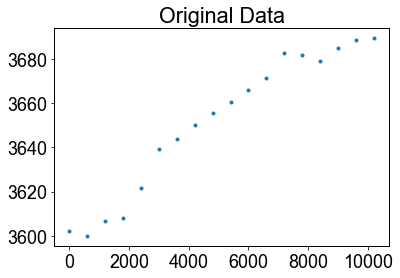

In [ ]:
#xs = np.arange(34)*dt
#ys = par1_mean[2:36]


#xs = np.arange(68)*dt
#ys = baz_mean[2:70]


#ys = intensities_all[intensities_all.columns[0::2]].dropna().mean(axis=1)
ys = intensities_all_par1.mean(axis=1)
xs = np.arange(len(ys))*dt

plt.plot(xs, ys, '.')
plt.title("Original Data")

In [ ]:


xs = xs[0:-2]
ys = ys[0:-2]

R² = 0.9755091120238859
Y = 144.21344602441636 * (1-e^(-0.00011843080306046771 * x)) + 3591.8638206600826
T_1/2 = 5852.760959545653


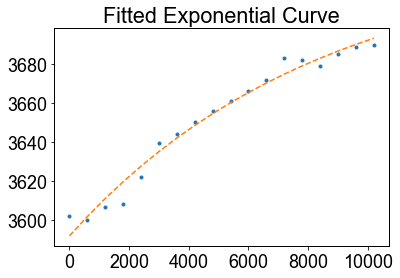

In [ ]:
# perform the fit
#p0=[1,1,max(ys)]
#p0 = [1, -np.log(0.5)/300, max(ys)]
#p0 = [1, -np.log(0.5)/300, 0]
p0=[max(ys), -np.log(0.5)/300,0]
params, cv = scipy.optimize.curve_fit(monoExp2, xs, ys, p0, maxfev=10000)
m, t, k = params
t_half = np.log(0.5)/(-t)

# determine quality of the fit
squaredDiffs = np.square(ys - monoExp2(xs, m, t, k))
squaredDiffsFromMean = np.square(ys - np.mean(ys))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")

# plot the results
plt.plot(xs, ys, '.', label="data")
plt.plot(xs, monoExp2(xs, m, t, k), '--', label="fitted")
plt.title("Fitted Exponential Curve")

#plt.plot(xs, monoExp2(xs, m_baz, t_baz, k_baz), '--', label="fitted")

# inspect the parameters
print(f"Y = {m} * (1-e^(-{t} * x)) + {k}")
#print(f"Tau = {tauSec * 1e6} µs")
print(f"T_1/2 = {t_half}")

R² = 0.9755091120276036
Y = -144.21270901527825 * (e^(-0.00011843200108139225 * x)) + 3736.0764339639386
T_1/2 = 5852.701754854084


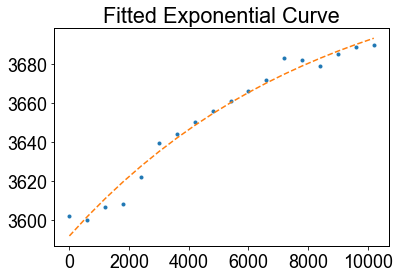

In [ ]:
# perform the fit
#p0=[1,1,max(ys)]
#p0 = [1, -np.log(0.5)/300, max(ys)]
#p0 = [1, -np.log(0.5)/300, 0]
p0=[max(ys), -np.log(0.5)/300,0]
params, cv = scipy.optimize.curve_fit(monoExp, xs, ys, p0, maxfev=10000)
m, t, k = params
t_half = np.log(0.5)/(-t)

# determine quality of the fit
squaredDiffs = np.square(ys - monoExp(xs, m, t, k))
squaredDiffsFromMean = np.square(ys - np.mean(ys))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")

# plot the results
plt.plot(xs, ys, '.', label="data")
plt.plot(xs, monoExp(xs, m, t, k), '--', label="fitted")
plt.title("Fitted Exponential Curve")

#plt.plot(xs, monoExp2(xs, m_baz, t_baz, k_baz), '--', label="fitted")

# inspect the parameters
print(f"Y = {m} * (e^(-{t} * x)) + {k}")
#print(f"Tau = {tauSec * 1e6} µs")
print(f"T_1/2 = {t_half}")

[-6.86074663e+04 -2.85495480e+03 -5.65755036e-07  3.78783205e+04]


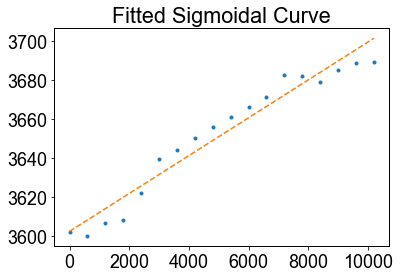

In [ ]:
def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0)))+b
    return (y)



#baz_mean_ablation = intensities_all.Mean
#ys_sigm = baz_mean_ablation[0:121]
#ys = baz_mean_ablation

xs_sigm = df.index.values
ys_sigm = df.Mean.values#-df.Mean.values[0]
#ys_sigm = ys_sigm/ys_sigm.max()

#index = pd.date_range('1/1/2000', periods=len(ys_sigm), freq='60s')
#series = pd.Series(ys_sigm.values, index=index)
#ys_sigm = series.resample("1 min").mean()

#xs_sigm = np.arange(len(ys_sigm))*dt


p0 = [max(ys_sigm), np.median(xs_sigm),0,min(ys_sigm)] # this is an mandatory initial guess

#popt, pcov = scipy.optimize.curve_fit(sigmoid, xs_sigm, ys_sigm,p0, maxfev = 10000)#, method='dogbox')
popt, pcov = scipy.optimize.curve_fit(sigmoid, xs_sigm, ys_sigm,p0, maxfev = 10000)#, bounds=([-500, 0, -np.inf, -np.inf], [np.inf, np.inf, np.inf, np.inf]))

L_sigm, x0_sigm, k_sigm, b_sigm = popt


# plot the results
plt.plot(xs_sigm, ys_sigm, '.', label="data")

#xs_sigm = np.arange(len(ys_sigm)+20)*dt

plt.plot(xs_sigm, sigmoid(xs_sigm, L_sigm, x0_sigm, k_sigm, b_sigm), '--', label="fitted")
plt.title("Fitted Sigmoidal Curve")
print(popt)
#plt.plot(xs_sigm, monoExp2(xs_sigm, m, t, k), '--', label="fitted")
#plt.plot(xs_sigm, sigmoid(xs_sigm, L_aPKC, x0_aPKC, k_aPKC, b_aPKC), '--', label="fitted")

#plt.plot(xs_sigm, monoExp2(xs_sigm, m_baz, t_baz, k_baz), '--', label="fitted")



In [ ]:

L_l, x0_l, k_l, b_l = popt


In [ ]:
L_l, x0_l, k_l, b_l

(152306.86731711437,
 -40292.57687582873,
 0.00016568422781176764,
 -152075.5347785577)

In [ ]:
popt

array([ 8.75724015e+02, -4.39524204e+02, -4.42065044e-04,  1.40005790e+02])

In [ ]:
L_aPKC, x0_aPKC, k_aPKC, b_aPKC = popt
